# **Dijkstra's**

When we used BFS to find the "shortest" path, we were finding the path with the least number of edges.
A weighted graph is one where the edges are assigned some value (weight). Take the following graph as an example.

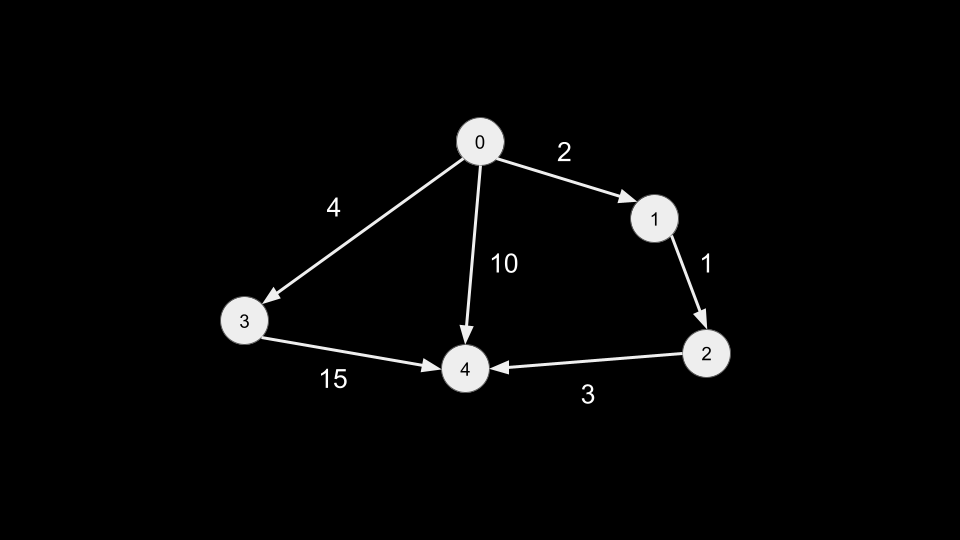

There are many algorithms that can be used to find shortest paths in weighted graphs. Perhaps the most prominent, efficient, and easy-to-implement one is Dijkstra's algorithm.

The idea behind Dijkstra's algorithm is to use a min-heap to store nodes, like how we used stacks in DFS and queues in BFS. With each node, we will also keep track of the weight of the path used to reach the node from the source. The min-heap will judge each element according to this weight. At each iteration, we retrieve a node by popping from the min-heap, which provides us the node with the minimum weight path.

We also keep the minimum distance so far from the source for every node. If our nodes are numbered from 0 to n - 1, it's convenient to use an array distances of length n to do this. Initially, we will have all values in this array as a large value (like infinity), except for the source which will have a value of 0.

At each node, we iterate over the neighbors. Consider the current distance from the source (which we store with each node in the heap) as curr_dist. For a given neighbor nei, consider the weight of the edge node -> nei as weight. Traversing to this neighbor would result in a path weight of dist = curr_dist + weight. There are two possibilities:

1. dist >= distances[nei]. In this case, we already found a path with a shorter distance earlier, and thus traversing to nei on the current path is pointless.
2. dist < distances[nei]. Traversing to nei on the current path is the shortest path we have seen so far to nei. We should update distances[nei] = dist and push (dist, nei) onto the heap

**Implementation**

    // array of length n with large values
    distances = [infinity] * n
    distances[source] = 0

    // min heap
    heap = [(0, source)]

    while (heap not empty) {
        curr_dist, node = heap.pop()
        if (curr_dist > distances[node]) {
            // optimization step: ignore current path if we found a better one
            continue;
        }

        for (nei, weight: [edges from node]) {
            dist = currDist + weight

            // add neighbor to heap if it creates a shorter path
            if (dist < distances[nei]) {
                distances[nei] = dist
                heap.push((dist, nei))
            }
        }
    }

**code**

In [1]:
import heapq

class Node:
    def __init__(self, name):
        self.name = name
        self.adjacencies_list = []
        self.visited = False
        self.predecessor = None
        self.min_distance = float('inf')
    
    def __lt__(self, other):
        return self.min_distance < other.min_distance

class Edge:
    def __init__(self, weight, start_vertex, target_vertex):
        self.weight = weight
        self.start_vertex = start_vertex
        self.target_vertex = target_vertex

class Graph:
    def __init__(self):
        self.nodes = []
    
    def add_node(self, node):
        self.nodes.append(node)
    
    def add_edge(self, weight, start_vertex, target_vertex):
        edge = Edge(weight, start_vertex, target_vertex)
        start_vertex.adjacencies_list.append(edge)
    
    def calculate_shortest_path(self, start_node):
        queue = []
        start_node.min_distance = 0
        heapq.heappush(queue, start_node)
        
        while queue:
            current_node = heapq.heappop(queue)
            current_node.visited = True
            
            for edge in current_node.adjacencies_list:
                u = edge.start_vertex
                v = edge.target_vertex
                new_distance = u.min_distance + edge.weight
                
                if new_distance < v.min_distance:
                    v.predecessor = u
                    v.min_distance = new_distance
                    if not v.visited:
                        heapq.heappush(queue, v)
    
    def get_shortest_path(self, target_vertex):
        print("Shortest path to vertex is: ", target_vertex.min_distance)
        node = target_vertex
        path = []
        
        while node is not None:
            path.append(node.name)
            node = node.predecessor
        
        return path[::-1]

# Example usage
node1 = Node("A")
node2 = Node("B")
node3 = Node("C")
node4 = Node("D")

graph = Graph()
graph.add_node(node1)
graph.add_node(node2)
graph.add_node(node3)
graph.add_node(node4)

graph.add_edge(1, node1, node2)
graph.add_edge(1, node2, node3)
graph.add_edge(2, node1, node3)
graph.add_edge(1, node3, node4)

graph.calculate_shortest_path(node1)
path = graph.get_shortest_path(node4)
print("Path:", path)


Shortest path to vertex is:  3
Path: ['A', 'C', 'D']


leetcode example: 743. Network Delay Time:

You are given a network of n nodes, labeled from 1 to n. You are also given times, a list of travel times as directed edges. Each element in times is of the format [u, v, w], indicating that it takes w time for a signal to go from u to v.

You are also given an integer k. We will send a signal from node k. Return the minimum time it takes for every node to receive the signal. If it's impossible for all nodes to receive the signal, return -1.

In [4]:
from collections import defaultdict
import heapq
def networkDelayTime(times, n, k):
    edges = defaultdict(list)

    #creating adjacency dict
    for u,v,w in times:
        edges[u].append((v, w))
    
    minHeap = [(0 , k)]
    visited = set()
    t = 0
    while minHeap:
        w1, n1 = heapq.heappop(minHeap)
        if n1 in visited:
             continue
        visited.add(n1)
        t = max(t, w1)

        #BFS for searching through the neighbours
        for n2, w2 in edges[n1]:
            if n2 not in visited:
                heapq.heappush(minHeap, (w1 + w2, n2))

    return t if len(visited) == n else -1

In [5]:
times = [[2,1,1],[2,3,1],[3,4,1]]
networkDelayTime(times, 4, 2)

2